# Del 8: Uvod v strojno učenje - Nadaljevanje

In [ ]:
import pandas as pd
import numpy as np

## Instance Based Learning Vs. Model Based Learning




<p><img alt="KNN Complexity" src="images/knn_complexity.svg"></p>

<p><img alt="Model Based Learning" src="images/regression_complexity.png"></p>


## Linear Regression

### Introduction To The Data


<p>Here are some of the columns:</p>
<ul>
<li><code>Lot Area</code>: Lot size in square feet.</li>
<li><code>Overall Qual</code>: Rates the overall material and finish of the house.</li>
<li><code>Overall Cond</code>: Rates the overall condition of the house.</li>
<li><code>Year Built</code>: Original construction date.</li>
<li><code>Low Qual Fin SF</code>: Low quality finished square feet (all floors).</li>
<li><code>Full Bath</code>: Full bathrooms above grade.</li>
<li><code>Fireplaces</code>: Number of fireplaces.</li>
</ul>


In [1]:
import pandas as pd
data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

### Simple Linear Regression


<p><img alt="Simple Linear Regression" src="images/simple_linear_regression.svg"></p>


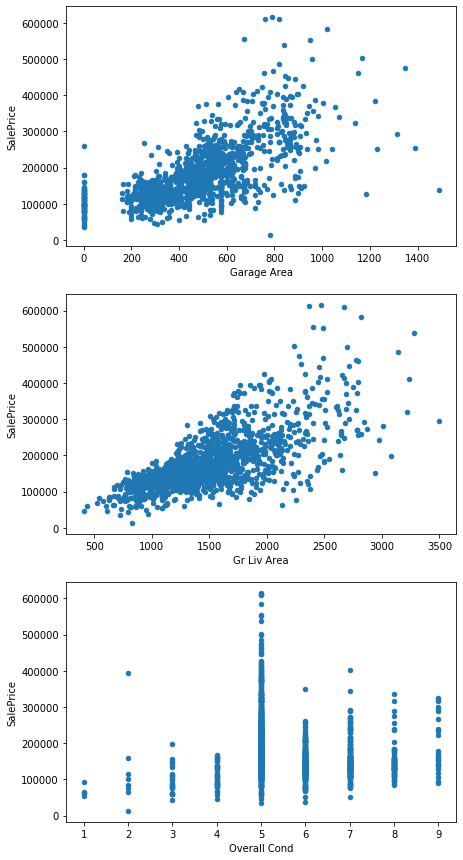

In [3]:
import matplotlib.pyplot as plt
# For prettier plots.
import seaborn
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

### Using Scikit-Learn To Train And Predict

In [4]:
# modul za linearno regresijo uporabimo
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])

print(lr.coef_)
print(lr.intercept_)



a0 = lr.intercept_

a1 = lr.coef_

[116.86624683]
5366.821710056014


In [8]:
# izvedemo napovedovanje
import numpy as np

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])

from sklearn.metrics import mean_squared_error

train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])


In [9]:
train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

In [10]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56034.3620014128
57088.25161263909


### Multiple Linear Regression

In [11]:
cols = ['Overall Cond', 'Gr Liv Area']

lr = LinearRegression()
lr.fit(train[cols], train['SalePrice'])

from sklearn.metrics import mean_squared_error

train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])



In [12]:
train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

In [13]:
print(train_rmse_2)
print(test_rmse_2)

56032.39801525867
57066.90779448559


### Missing Values

In [ ]:
data = pd.read_csv('data/AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

In [14]:
# izberemo samo stolpce, ki so numerični. Izločimo kategorične podatke. Preverimo koliko imamo stolpcev z NaN-i
numerical_train = train.select_dtypes(include=['int', 'float'])
numerical_train = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)
null_series = numerical_train.isnull().sum()
print(null_series)

Order                0
MS SubClass          0
Lot Frontage       249
Lot Area             0
Overall Qual         0
Overall Cond         0
Mas Vnr Area        11
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
SalePrice            0
dtype: int64


In [15]:
full_cols_series = null_series[null_series == 0]

### Correlating Feature Columns With Target Column

In [16]:
# pogledamo korelacije med vrednostjo, ki jo napovedujemo in podatki
len(full_cols_series)

25

In [17]:
# izberemo samo željene stolpce
train_subset = train[full_cols_series.index]

In [18]:
corrmat = train_subset.corr()

In [20]:
sorted_corrs = corrmat['SalePrice'].abs().sort_values()

In [21]:
sorted_corrs

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

### Correlation Matrix Heatmap

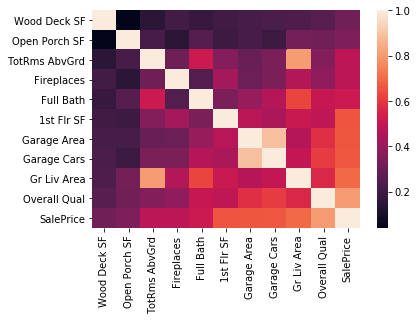

In [24]:
# da si lažje predstavljamo in da izločimo spremenljivke, ki so med sabo linearno korelirane
import seaborn as sns
import matplotlib.pyplot as plt

strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()
sns.heatmap(corrmat)


plt.show()

# med sabo korelirajo gr liv area in totRms ter garageCars in GarageArea

### Train And Test Model

In [25]:
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
test[final_corr_cols.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
Wood Deck SF     1470 non-null int64
Open Porch SF    1470 non-null int64
Fireplaces       1470 non-null int64
Full Bath        1470 non-null int64
1st Flr SF       1470 non-null int64
Garage Area      1469 non-null float64
Gr Liv Area      1470 non-null int64
Overall Qual     1470 non-null int64
SalePrice        1470 non-null int64
dtypes: float64(1), int64(8)
memory usage: 103.4 KB


In [32]:
# manjka en podatek u Garage Area, vržemo to vrstico ven
features = final_corr_cols.drop(['SalePrice']).index
clean_test = test[final_corr_cols.index].dropna()
target = 'SalePrice'

In [33]:
lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

In [35]:
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

In [36]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.97629185852
41032.02612019769


### Removing Low Variance Features

In [38]:
# če spremenljivke imajo nizko varianco, jih moramo odstaniti, ker nam taki podatki ne pomagajo
# najprej normaliziramo vrednosti med 0 in 1

In [39]:
unit_train = (train[features] - train[features].min()) / (train[features].max() - train[features].min())

In [40]:
print(unit_train.min())
print(unit_train.max())

Wood Deck SF     0.0
Open Porch SF    0.0
Fireplaces       0.0
Full Bath        0.0
1st Flr SF       0.0
Garage Area      0.0
Gr Liv Area      0.0
Overall Qual     0.0
dtype: float64
Wood Deck SF     1.0
Open Porch SF    1.0
Fireplaces       1.0
Full Bath        1.0
1st Flr SF       1.0
Garage Area      1.0
Gr Liv Area      1.0
Overall Qual     1.0
dtype: float64


In [41]:
sorted_vars = unit_train.var().sort_values()
print(sorted_vars)

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64


### Final Model

In [42]:
clean_test = test[final_corr_cols.index].dropna()
features = features.drop('Open Porch SF')

In [43]:
lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

In [45]:
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

In [46]:
train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

In [47]:
print(train_rmse_2)
print(test_rmse_2)

34372.696707783965
40591.427024377364


## Exercise: Predicting House Sale Prices


### Introduction

<img src="images/pipeline.svg">

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold

In [49]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [50]:
df.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

In [51]:
len(df)

2930

In [52]:
# naredili bomo tri funkcije:
# - transform features
# - 


def transform_features(df):
    return df

In [53]:
# ni manjčajočih vrednosti
df['Gr Liv Area'].isnull().sum()

0

In [54]:
def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

In [55]:
def train_and_test(df, debug=False):  
    train = df[:1460]
    test = df[1460:]
    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    features = numeric_train.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    

    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [56]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, debug = True)

rmse

Selected features: ['Gr Liv Area']


57088.25161263909

### Feature Engineering

[Dataset metadata](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

#### Missing Values

1: All columns: Drop any with 5% or more missing values for now.

In [57]:
num_missing = df.isnull().sum()

In [58]:
num_missing

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [61]:
# Filter Series to columns containing >5% missing values

drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()


In [62]:
drop_missing_cols

Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Lot Frontage      490
Fireplace Qu     1422
Fence            2358
Alley            2732
Misc Feature     2824
Pool QC          2917
dtype: int64

In [63]:
# Drop those columns from the data frame. Note the use of the .index accessor
df = df.drop(drop_missing_cols.index, axis= 1)

In [65]:
#df.isnull().sum()

2: Text columns: Drop any with 1 or more missing values for now.

In [69]:
df.select_dtypes(include = ['object']).isnull().sum().sort_values()

MS Zoning          0
Paved Drive        0
Functional         0
Kitchen Qual       0
Central Air        0
Heating QC         0
Heating            0
Foundation         0
Exter Cond         0
Exter Qual         0
Sale Type          0
Exterior 2nd       0
Exterior 1st       0
Sale Condition     0
Roof Style         0
House Style        0
Bldg Type          0
Condition 2        0
Condition 1        0
Neighborhood       0
Street             0
Lot Shape          0
Land Contour       0
Roof Matl          0
Land Slope         0
Lot Config         0
Utilities          0
Electrical         1
Mas Vnr Type      23
Bsmt Cond         80
Bsmt Qual         80
BsmtFin Type 1    80
BsmtFin Type 2    81
Bsmt Exposure     83
dtype: int64

In [70]:
## Series object: column name -> number of missing values
text_mv_counts = df.select_dtypes(include = ['object']).isnull().sum().sort_values()


In [71]:
## Filter Series to columns containing *any* missing values
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]

In [72]:
drop_missing_cols_2

Electrical         1
Mas Vnr Type      23
Bsmt Cond         80
Bsmt Qual         80
BsmtFin Type 1    80
BsmtFin Type 2    81
Bsmt Exposure     83
dtype: int64

In [73]:
df = df.drop(drop_missing_cols_2.index, axis = 1)

In [75]:
#df.isnull().sum()

3: Numerical columns: For columns with missing values, fill in with the most common value in that column

In [76]:
## Compute column-wise missing value counts
num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [84]:
## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient = 'records')[0]

In [85]:
replacement_values_dict

{'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

In [87]:
## Use `pd.DataFrame.fillna()` to replace missing values.
df = df.fillna(replacement_values_dict)



In [88]:
## Verify that every column has 0 missing values
df.isnull().sum().value_counts()

0    64
dtype: int64

#### Transforming Improper Numerical Features

In [89]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [90]:


df[['Year Remod/Add', 'Year Built']].head()

,Year Remod/Add,Year Built
0,1960,1960
1,1961,1961
2,1958,1958
3,1968,1968
4,1998,1997


In [91]:
# dobimo starost hiše ob prodaji

years_sold = df['Yr Sold'] - df['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [93]:
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [94]:
years_sold.head()

0    50
1    49
2    52
3    42
4    13
dtype: int64

In [95]:
## Create new columns
df['Years Before Sale'] = years_sold
df['Years Since Remod'] = years_since_remod

## Drop rows with negative values for both of these new features
df = df.drop([1702, 2180, 2181], axis=0)

## No longer need original year columns
df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)

Drop columns that:
- that aren't useful for ML
- leak data about the final sale, read more about columns here

In [96]:
## Drop columns that aren't useful for ML
df = df.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

In [97]:
df.dtypes.value_counts()

object     41
int64      24
float64    11
dtype: int64

In [ ]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [102]:
def transform_features(df, debug=False):
    # naredimo kopijo dfja
    df_working = df.copy()
    
    # odstranimo vse stolpce ki vsebujejo več kot 5% manjkajočih vrednosti
    num_missing = df_working.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    if debug: print(f'\nDropping columns: {drop_missing_cols.index.tolist()}')
    df_working = df_working.drop(drop_missing_cols.index, axis = 1)
    
    # odstranimo vse stolpce ki vsebujejo object in manjkajoče vrednosti
    df_working.select_dtypes(include = ['object']).isnull().sum().sort_values()
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    if debug: print(f'\nDropping columns (object): {drop_missing_cols_2.index.tolist()}')
    df_working = df_working.drop(drop_missing_cols_2.index, axis = 1)
    
    # ostale manjkajoče vrednosti dopolnemo z najbolj pogosto vrednostjo v stolpcu
    num_missing = df_working.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df_working)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df_working[fixable_numeric_cols.index].mode().to_dict(orient = 'records')[0]
    fixable_numeric_cols
    if debug: 
        print('\nReplacement values:')
        for key, value in replacement_values_dict.items():
            print(f'\t{key}: {value}')
    df_working = df_working.fillna(replacement_values_dict)
    
    # naredimo nove značilke
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    drop_rows = years_since_remod[years_since_remod < 0].index
    df_working = df_working.drop(drop_rows, axis = 0)
    
    
    
    # odvržemo še ostale nepotrebne stolpce
    df_working = df_working.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    
    return df_working   

In [103]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=True)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, debug=True)

rmse


Dropping columns: ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature', 'Pool QC']

Dropping columns (object): ['Electrical', 'Mas Vnr Type', 'Bsmt Cond', 'Bsmt Qual', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Exposure']

Replacement values:
	BsmtFin SF 1: 0.0
	BsmtFin SF 2: 0.0
	Bsmt Unf SF: 0.0
	Total Bsmt SF: 0.0
	Garage Cars: 2.0
	Garage Area: 0.0
	Bsmt Full Bath: 0.0
	Bsmt Half Bath: 0.0
	Mas Vnr Area: 0.0
Selected features: ['Gr Liv Area']


55275.36731241307

### Feature Selection

In [104]:
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
numerical_df.head(5)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,...,528.0,210,62,0,0,0,0,0,2010,215000
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,...,730.0,140,0,0,0,120,0,0,2010,105000
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,...,312.0,393,36,0,0,0,0,12500,2010,172000
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,...,522.0,0,0,0,0,0,0,0,2010,244000
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,...,482.0,212,34,0,0,0,0,0,2010,189900


In [106]:
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()

In [107]:
## Let's only keep columns with a correlation coefficient of larger than 0.4 (arbitrary, worth experimenting later!)
abs_corr_coeffs[abs_corr_coeffs > 0.4]

BsmtFin SF 1     0.439284
Fireplaces       0.474831
TotRms AbvGrd    0.498574
Mas Vnr Area     0.506983
Full Bath        0.546118
1st Flr SF       0.635185
Garage Area      0.641425
Total Bsmt SF    0.644012
Garage Cars      0.648361
Gr Liv Area      0.717596
Overall Qual     0.801206
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [108]:
## Drop columns with less than 0.4 correlation with SalePrice
transform_df = transform_df.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis = 1)

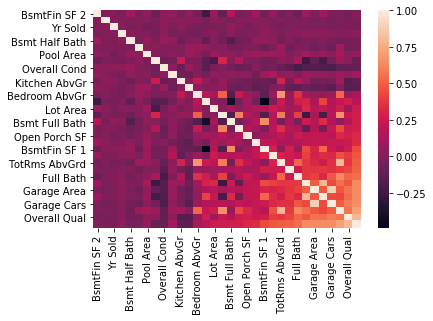

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = numerical_df[abs_corr_coeffs.index].corr()
sns.heatmap(corrmat)
plt.show()

In [110]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

def select_features(df_, coeff_threshold=0.4, debug=False):
    df = df_.copy()
    df_org_shape = df.shape
    numerical_df = transform_df.select_dtypes(include = ['int','float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis = 1)
    
    
    
    if debug: print(f'We dropped {df_org_shape[1] - df.shape[1]} columns.')
    return df

In [111]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=True)
filtered_df = select_features(transform_df, coeff_threshold=0.4, debug=True)
rmse = train_and_test(filtered_df, debug=True)

rmse


Dropping columns: ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature', 'Pool QC']

Dropping columns (object): ['Electrical', 'Mas Vnr Type', 'Bsmt Cond', 'Bsmt Qual', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Exposure']

Replacement values:
	BsmtFin SF 1: 0.0
	BsmtFin SF 2: 0.0
	Bsmt Unf SF: 0.0
	Total Bsmt SF: 0.0
	Garage Cars: 2.0
	Garage Area: 0.0
	Bsmt Full Bath: 0.0
	Bsmt Half Bath: 0.0
	Mas Vnr Area: 0.0
We dropped 20 columns.
Selected features: ['Overall Qual', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area']


37359.15452670517

#### Categorical Features

In [112]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")

In [113]:
df['Utilities'].value_counts()

AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

In [114]:
df['Street'].value_counts()

Pave    2918
Grvl      12
Name: Street, dtype: int64

In [115]:
df['House Style'].value_counts()

1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

In [117]:
df['Utilities'] = df['Utilities'].astype('category')

In [118]:
df['Utilities'].head()

0    AllPub
1    AllPub
2    AllPub
3    AllPub
4    AllPub
Name: Utilities, dtype: category
Categories (3, object): [AllPub, NoSeWa, NoSewr]

In [119]:
df['Utilities'].cat.codes.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [120]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=False)
text_cols = transform_df.select_dtypes(include=['object']).columns

for col in text_cols:
    print(col+":", len(transform_df[col].unique()))
    
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
transform_df['Utilities'].cat.codes.value_counts()

MS Zoning: 7
Street: 2
Lot Shape: 4
Land Contour: 4
Utilities: 3
Lot Config: 5
Land Slope: 3
Neighborhood: 28
Condition 1: 9
Condition 2: 8
Bldg Type: 5
House Style: 8
Roof Style: 6
Roof Matl: 8
Exterior 1st: 16
Exterior 2nd: 17
Exter Qual: 4
Exter Cond: 5
Foundation: 6
Heating: 6
Heating QC: 5
Central Air: 2
Kitchen Qual: 5
Functional: 8
Paved Drive: 3


0    2924
2       2
1       1
dtype: int64

#### Dummy Coding

In [121]:
# kategorične vrednosti pretvorimo v tolikšno število stoplcev, kolikor je unique vrednosti
# vrednosti v teh stolpcih so 0 ali 1



pd.get_dummies(df['Utilities']).head()

,AllPub,NoSeWa,NoSewr
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [122]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [123]:
## Which categorical columns have we still carried with us? We'll test tehse 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

In [124]:
dummy_cols = pd.DataFrame()
for col in transform_cat_cols:
    col_dummies = pd.get_dummies(transform_df[col])
    transform_df = pd.concat([transform_df, col_dummies], axis = 1)
    del transform_df[col]

In [125]:
transform_df.shape

(2927, 193)

In [126]:
transform_df.head()

,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Mas Vnr Area,Exter Qual,Exter Cond,BsmtFin SF 1,...,Stone,Wood,Floor,GasA,GasW,Grav,OthW,Wall,N,Y
0,31770,IR1,AllPub,Gtl,6,5,112.0,TA,TA,639.0,...,0,0,0,1,0,0,0,0,0,1
1,11622,Reg,AllPub,Gtl,5,6,0.0,TA,TA,468.0,...,0,0,0,1,0,0,0,0,0,1
2,14267,IR1,AllPub,Gtl,6,6,108.0,TA,TA,923.0,...,0,0,0,1,0,0,0,0,0,1
3,11160,Reg,AllPub,Gtl,7,5,0.0,Gd,TA,1065.0,...,0,0,0,1,0,0,0,0,0,1
4,13830,IR1,AllPub,Gtl,5,5,0.0,TA,TA,791.0,...,0,0,0,1,0,0,0,0,0,1


In [127]:
transform_df.dtypes.value_counts()

uint8       153
int64        22
float64       9
category      3
category      1
category      1
category      1
category      1
category      1
category      1
dtype: int64

In [128]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [129]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df, debug=False)

In [132]:
## Which categorical columns have we still carried with us? We'll test tehse 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

## How many unique values in each categorical column?
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
uniqueness_counts
## Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [133]:
## Select just the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
## Create dummy columns and add back to the dataframe!
transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1).drop(text_cols,axis=1)

In [134]:
transform_df.dtypes.value_counts()

uint8      116
int64       22
float64      9
dtype: int64

Update select_features()

In [135]:
def select_features(df_, coeff_threshold=0.4, uniq_threshold=10, debug=False):
    df = df_.copy()
    df_org_shape = df.shape
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    if debug: print(f'We dropped {df_org_shape[1] - df.shape[1]} columns.')
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > uniq_threshold].index
    df = df.drop(drop_nonuniq_cols, axis = 1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    
    df = pd.concat([
        df,
        pd.get_dummies(df.select_dtypes(include = ['category']))
    ], axis = 1).drop(text_cols, axis=1)
    
    return df

In [136]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.4, uniq_threshold=10,debug=False)
rmse = train_and_test(filtered_df)

rmse

33447.4201540098

### Train And Test

In [137]:
def train_and_test(df, k=0, debug=False):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

- When k equals 0, perform holdout validation (what we already implemented):
    - Select the first 1460 rows and assign to train.
    - Select the remaining rows and assign to test.
    - Train on train and test on test.
    - Compute the RMSE and return.

In [138]:
def train_and_test(df, k=0, debug=False):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
        
        
        # KOPIRAJ IZ NJEGOVEGA FAJLA NA GITHUBU
        

- When k equals 1, perform simple cross validation:
    - Shuffle the ordering of the rows in the data frame.
    - Select the first 1460 rows and assign to fold_one.
    - Select the remaining rows and assign to fold_two.
    - Train on fold_one and test on fold_two.
    - Train on fold_two and test on fold_one.
    - Compute the average RMSE and return.

In [ ]:
def train_and_test(df, k=0, debug=False):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
   






        print(rmse_one)
        print(rmse_two)
        return avg_rmse

- When k is greater than 1, implement k-fold cross validation using k folds:
    - Perform k-fold cross validation using k folds.
    - Calculate the average RMSE value and return this value.

In [140]:
def train_and_test(df, k=0, debug=False):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if debug: print(f'Selected features: {features.tolist()}')
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        if debug: print(rmse_one)
        if debug: print(rmse_two)
        return avg_rmse
    
    else:
        kf = KFold(n_splits = k, shuffle = True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)

            rmse = np.sqrt(mse)
            rmse_values.append(rmse)

        avg_rmse = np.mean(rmse_values)

    
    
    
        return avg_rmse

### Using the model

In [141]:
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse

29318.086241250683

#### Testing different thresholds

In [150]:
# coeff_threshold
coeff_threshold_params = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7]
rmse_values = list()

df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
for coeff_threshold_val in coeff_threshold_params:
    filtered_df = select_features(transform_df, coeff_threshold = coeff_threshold_val)
    rmse = train_and_test(filtered_df, k=0.4)
    rmse_values.append(rmse)


ValueError: The number of folds must be of Integral type. 0.4 of type <class 'float'> was passed.

In [146]:
rmse_values

[]

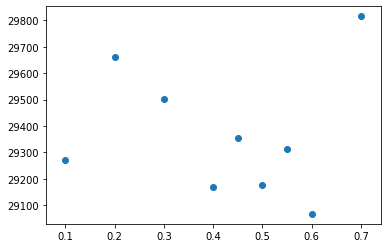

In [144]:
plt.scatter(x=coeff_threshold_params, y=rmse_values)
plt.show()

In [ ]:
# uniq_threshold
uniq_threshold_params = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
rmse_values = list()

df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)



In [ ]:
rmse_values

In [ ]:
plt.scatter(x=uniq_threshold_params, y=rmse_values)
plt.show()

In [ ]:
# optimiziran model
df = pd.read_csv("data/AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df, coeff_threshold=0.1, uniq_threshold=5,debug=False)
rmse = train_and_test(filtered_df, k=4)
rmse